In [25]:
# import the libraries as shown below
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings as w
w.filterwarnings('ignore')

from keras.applications.vgg16 import VGG16

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/Dataset/House_dataset.rar (Unzipped Files)/House_dataset/Training'

In [3]:
DIRECTORY = r'/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/Dataset/House_dataset.rar (Unzipped Files)/House_dataset/Training'
CATEGORIES = ["House", "Not_House"]

In [4]:
import os
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

In [5]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [20]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
# tell the model what cost and optimization method to use
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
                                  

#test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(trainX, trainY,
                                                 batch_size = 32)
                                    

In [14]:
#test_set = test_datagen.flow(testX, testY,
                                            #batch_size = 32)
                                           

In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=(testX, testY),
  epochs=20,
  batch_size=32,
  steps_per_epoch=len(trainX) // BS,
  validation_steps=len(testX) // BS
)

Epoch 1/20
53/53 [==============================] - 20s 368ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0778 - val_accuracy: 0.9736
Epoch 2/20
53/53 [==============================] - 20s 372ms/step - loss: 0.0424 - accuracy: 0.9894 - val_loss: 0.0764 - val_accuracy: 0.9760
Epoch 3/20
53/53 [==============================] - 20s 376ms/step - loss: 0.0444 - accuracy: 0.9876 - val_loss: 0.0785 - val_accuracy: 0.9760
Epoch 4/20
53/53 [==============================] - 20s 376ms/step - loss: 0.0492 - accuracy: 0.9858 - val_loss: 0.0774 - val_accuracy: 0.9760
Epoch 5/20
53/53 [==============================] - 20s 375ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0717 - val_accuracy: 0.9808
Epoch 6/20
53/53 [==============================] - 20s 372ms/step - loss: 0.0478 - accuracy: 0.9864 - val_loss: 0.0753 - val_accuracy: 0.9760
Epoch 7/20
53/53 [==============================] - 20s 376ms/step - loss: 0.0424 - accuracy: 0.9882 - val_loss: 0.0749 - val_accuracy: 0.9784

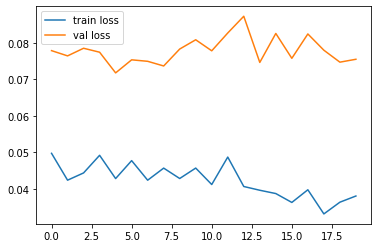

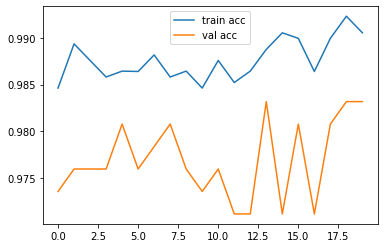

<Figure size 432x288 with 0 Axes>

In [29]:
# loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [43]:
y_pred= model.predict(testX)
y_pred

array([[9.99995589e-01, 4.39172936e-06],
       [6.91051013e-04, 9.99308944e-01],
       [2.44936632e-06, 9.99997497e-01],
       [9.99945998e-01, 5.40071705e-05],
       [1.59389998e-07, 9.99999881e-01],
       [5.68007003e-04, 9.99432027e-01],
       [7.49107970e-13, 1.00000000e+00],
       [1.30319651e-15, 1.00000000e+00],
       [6.87360057e-07, 9.99999285e-01],
       [2.62051600e-07, 9.99999762e-01],
       [2.77411105e-04, 9.99722540e-01],
       [2.74160502e-05, 9.99972582e-01],
       [1.56921256e-13, 1.00000000e+00],
       [1.00000000e+00, 4.42192116e-11],
       [9.99375284e-01, 6.24722044e-04],
       [1.80955411e-07, 9.99999762e-01],
       [9.99996185e-01, 3.86803913e-06],
       [1.36331071e-10, 1.00000000e+00],
       [1.59808478e-05, 9.99984026e-01],
       [9.99762237e-01, 2.37817279e-04],
       [9.99987125e-01, 1.28297488e-05],
       [9.99968052e-01, 3.19772662e-05],
       [9.99906421e-01, 9.35831631e-05],
       [2.87242662e-14, 1.00000000e+00],
       [1.000000

In [45]:
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=1), y_pred,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       House       0.97      0.99      0.98       214
   Not_House       0.99      0.97      0.98       217

    accuracy                           0.98       431
   macro avg       0.98      0.98      0.98       431
weighted avg       0.98      0.98      0.98       431



MOBILENET MODEL

In [33]:
mv = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mv.layers:
    layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(mv.output)

prediction = Dense(2, activation='softmax')(x)

# create a model object
model1 = Model(inputs=mv.input, outputs=prediction)

model1.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [34]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model1.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [35]:
# fit the model
# Run the cell. It will take some time to execute
r1 = model1.fit(
  training_set,
  validation_data=(testX, testY),
  epochs=20,
  batch_size=32,
  steps_per_epoch=len(trainX) // BS,
  validation_steps=len(testX) // BS
)

Epoch 1/20
53/53 [==============================] - 20s 333ms/step - loss: 0.3221 - accuracy: 0.8948 - val_loss: 0.0651 - val_accuracy: 0.9856
Epoch 2/20
53/53 [==============================] - 17s 322ms/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0654 - val_accuracy: 0.9880
Epoch 3/20
53/53 [==============================] - 17s 319ms/step - loss: 0.0353 - accuracy: 0.9937 - val_loss: 0.0859 - val_accuracy: 0.9808
Epoch 4/20
53/53 [==============================] - 17s 320ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0699 - val_accuracy: 0.9880
Epoch 5/20
53/53 [==============================] - 17s 320ms/step - loss: 0.0224 - accuracy: 0.9958 - val_loss: 0.0711 - val_accuracy: 0.9880
Epoch 6/20
53/53 [==============================] - 17s 320ms/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.0683 - val_accuracy: 0.9856
Epoch 7/20
53/53 [==============================] - 17s 322ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0689 - val_accuracy: 0.9856

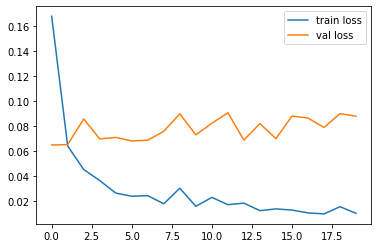

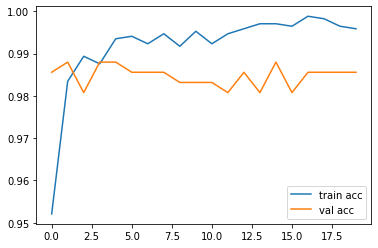

<Figure size 432x288 with 0 Axes>

In [36]:
# loss
import matplotlib.pyplot as plt

plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [40]:
y_pred1 = model1.predict(testX)
y_pred1

array([[1.00000000e+00, 2.25617036e-08],
       [5.21019228e-09, 1.00000000e+00],
       [6.22374097e-11, 1.00000000e+00],
       [1.00000000e+00, 5.82647776e-12],
       [5.11574694e-09, 1.00000000e+00],
       [9.47116878e-16, 1.00000000e+00],
       [3.77074816e-09, 1.00000000e+00],
       [1.98576472e-16, 1.00000000e+00],
       [1.94316640e-01, 8.05683374e-01],
       [3.82267302e-07, 9.99999642e-01],
       [6.56051036e-09, 1.00000000e+00],
       [6.52725771e-02, 9.34727371e-01],
       [5.89280523e-13, 1.00000000e+00],
       [1.00000000e+00, 7.84139192e-14],
       [1.00000000e+00, 8.04138256e-10],
       [1.45202671e-06, 9.99998569e-01],
       [1.00000000e+00, 4.05560099e-11],
       [4.69140861e-18, 1.00000000e+00],
       [9.14896547e-10, 1.00000000e+00],
       [1.00000000e+00, 3.49533948e-15],
       [1.00000000e+00, 1.55724305e-11],
       [1.00000000e+00, 4.15026857e-09],
       [1.00000000e+00, 5.39866925e-13],
       [1.17094301e-09, 1.00000000e+00],
       [1.000000

In [41]:
y_pred1 = np.argmax(y_pred1, axis=1)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=1), y_pred1,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       House       0.97      1.00      0.98       214
   Not_House       1.00      0.97      0.98       217

    accuracy                           0.98       431
   macro avg       0.98      0.98      0.98       431
weighted avg       0.98      0.98      0.98       431



In [76]:
model1.save('/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/predict_house.h5')

In [85]:
import pandas as pd
df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 


,Image_name,Predictions


In [91]:
df1 = pd.DataFrame({"Image_name":'abc',"Predictions":['House']})
df = df.append(df1, ignore_index=True)
df.head()

,Image_name,Predictions
0,abc,House
1,abc,House
2,abc,House


In [93]:
path = '/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/Dataset/House_dataset.rar (Unzipped Files)/House_dataset/Testing/Image (1).jpeg'
temp = path.split('/')
temp[10]

'Image (1).jpeg'

In [94]:
#from IPython.display import Image, display
import pandas as pd
df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 

def predict_house(dir_path):
  df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 
  for img in os.listdir(dir_path):
    img_path = os.path.join(dir_path, img)
    #display(Image(filename=img_path))
    temp = img_path.split('/')
    image = load_img(img_path, target_size=(224, 224))
    img_array = np.expand_dims(image, axis=0)
    image = preprocess_input(img_array)
    prediction = np.round(model1.predict(image))
    if prediction[:,0] == 1:
      p = 'House'
    else:
      p = "Not House"
    df1 = pd.DataFrame({"Image_name":temp[10],"Predictions":[p]})
    df = df.append(df1, ignore_index=True)
  return df

     

In [95]:
path='/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/Dataset/House_dataset.rar (Unzipped Files)/House_dataset/Testing'

df = predict_house(path)

In [96]:
df.head()

,Image_name,Predictions
0,Image (117).jpg,Not House
1,Image (116).jpg,Not House
2,Image (115).jpg,House
3,Image (114).jpg,Not House
4,Image (113).jpg,House


In [97]:
df.tail()

,Image_name,Predictions
574,Image (9).jpeg,House
575,Image (86).jpg,House
576,Image (89).jpg,Not House
577,Image (88).jpg,Not House
578,Image (87).jpg,House


In [98]:
df.to_csv('/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/predictions.csv') 

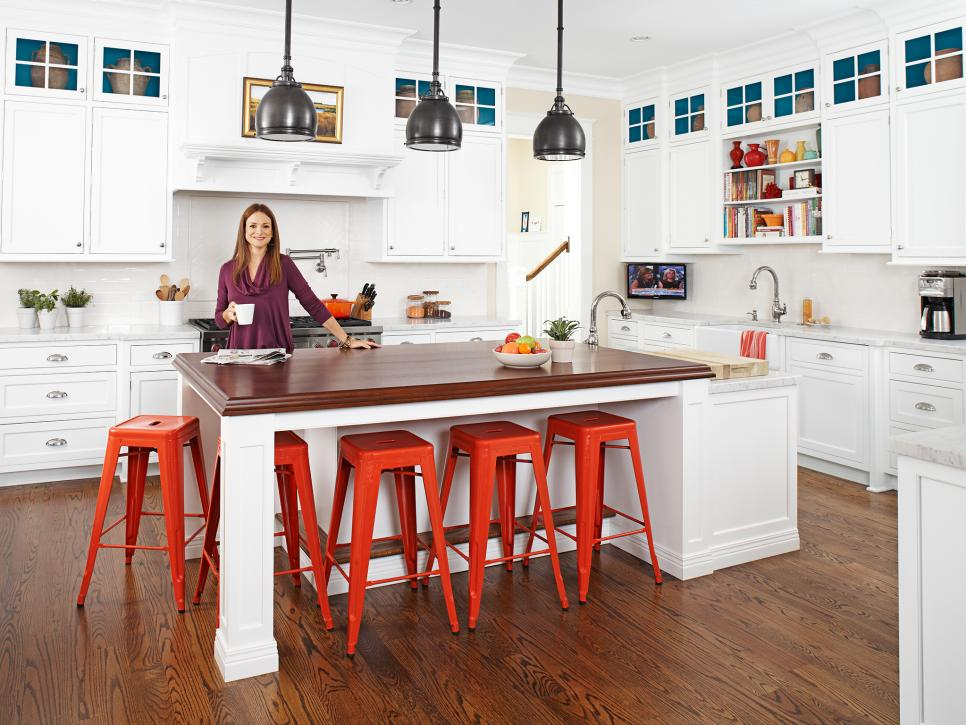

[1.]
[0.]
House


In [62]:
img_path='/content/drive/MyDrive/CV.zip (Unzipped Files)/CV/Dataset/House_dataset.rar (Unzipped Files)/House_dataset/Testing/Image (1).jpeg'
from IPython.display import Image, display
display(Image(filename=img_path))
image = load_img(img_path, target_size=(224, 224))
image = img_to_array(image)
img_array = np.expand_dims(image, axis=0)
image = preprocess_input(img_array)
prediction = np.round(model1.predict(image))
print(prediction[:,0])
print(prediction[:,1])
if prediction[:,0] == 1:
  print("House")
else:
  print("Not House")
     